# SHUBHAM SHARMA
## IIT BOMBAY

This code is for data preperation for object detection and pre-processing

(Using only three things to detect)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import cv2
import urllib
import tensorflow as tf

##

import numpy as np
import os
import random
from skimage import io
import pandas as pd
from matplotlib import pyplot as plt

1. train-images-boxable.csv file contains the image name and image url
2. train-annotations-bbox.csv file contains the bounding box info with the image id (name) and the image label name
3. class-descriptions-boxable.csv file contains the image label name corresponding to its class name

In [0]:
path_drive = 'gdrive/My Drive/IE-643 data/'
path_image = 'gdrive/My Drive/IE-643 data/train-images-boxable-with-rotation.csv'
path_annotation = 'gdrive/My Drive/IE-643 data/train-annotations-bbox.csv'
path_description = 'gdrive/My Drive/IE-643 data/class-descriptions-boxable.csv'

In [0]:
images_boxable = pd.read_csv(path_image)
images_boxable.head()

,ImageID,Subset,OriginalURL,OriginalLandingURL,License,AuthorProfileURL,Author,Title,OriginalSize,OriginalMD5,Thumbnail300KURL,Rotation
0,4fa8054781a4c382,train,https://farm3.staticflickr.com/5310/5898076654...,https://www.flickr.com/photos/michael-beat/589...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/michael-beat/,Michael Beat,...die FNF-Kerze,4405052,KFukvivpCM5QXl5SqKe41g==,https://c1.staticflickr.com/6/5310/5898076654_...,0.0
1,b37f763ae67d0888,train,https://c1.staticflickr.com/1/67/197493648_628...,https://www.flickr.com/photos/drstarbuck/19749...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/drstarbuck/,Karen,Three boys on a hill,494555,9IzEn38GRNsVpATuv7gzEA==,https://c3.staticflickr.com/1/67/197493648_628...,0.0
2,7e8584b0f487cb9e,train,https://c7.staticflickr.com/8/7056/7143870979_...,https://www.flickr.com/photos/circasassy/71438...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/circasassy/,CircaSassy,A Christmas carol and The cricket on the heart...,2371584,3hQwu0iSzY1VIoXiwp0/Mg==,https://c7.staticflickr.com/8/7056/7143870979_...,0.0
3,86638230febe21c4,train,https://farm5.staticflickr.com/5128/5301868579...,https://www.flickr.com/photos/ajcreencia/53018...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/ajcreencia/,Alex,Abbey and Kenny,949267,onB+rCZnGQg5PRX7xOs18Q==,https://c4.staticflickr.com/6/5128/5301868579_...,NaN
4,249086e72671397d,train,https://c6.staticflickr.com/4/3930/15342460029...,https://www.flickr.com/photos/codnewsroom/1534...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/codnewsroom/,COD Newsroom,Suburban Law Enforcement Academy 20th Annivers...,6541758,MjpaAVbMAWbCusSaxI1D7w==,https://c1.staticflickr.com/4/3930/15342460029...,0.0


In [0]:
annotations_bbox = pd.read_csv(path_annotation)
annotations_bbox.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,0,0,0
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,0,0,0


In [0]:
class_description = pd.read_csv(path_description)
class_description.head()

,name,class
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football


Let us see a single image:

In [0]:
ind = 10
print('length of the images_boxable: %d' %(len(images_boxable)) )
img_name = images_boxable['ImageID'][ind]
img_url = images_boxable['Thumbnail300KURL'][ind]
print('\t image_name: %s' % (img_name))
print('\t img_url: %s' % (img_url))
print('')
print('length of the annotations_bbox: %d' %(len(annotations_bbox)))
print('The number of bounding boxes are larger than number of images.')
print('')
print('length of the class_descriptions: %d' % (len(class_description)-1))
img = io.imread(img_url)


length of the images_boxable: 1743042
	 image_name: 51c5d8d5d9cd87ca
	 img_url: https://c7.staticflickr.com/1/95/222640893_86cf9e06d3_z.jpg

length of the annotations_bbox: 14610229
The number of bounding boxes are larger than number of images.

length of the class_descriptions: 600


(480, 640, 3)


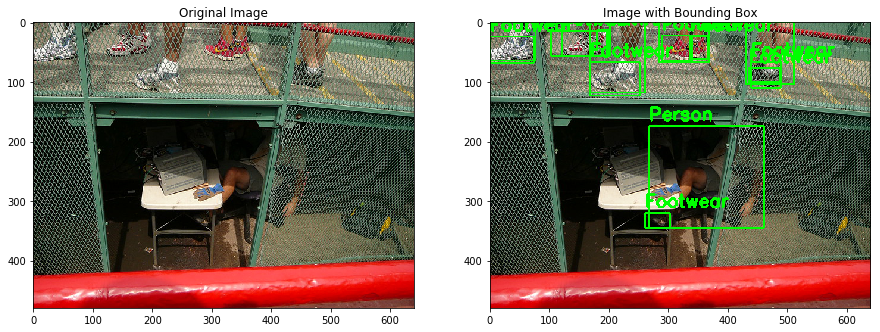

In [0]:
height, width, _ = img.shape
print(img.shape)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img)
img_id = img_name[:16]
bboxs = annotations_bbox[annotations_bbox['ImageID']==img_id]
img_bbox = img.copy()
for index, row in bboxs.iterrows():
    xmin = row['XMin']
    xmax = row['XMax']
    ymin = row['YMin']
    ymax = row['YMax']
    xmin = int(xmin*width)
    xmax = int(xmax*width)
    ymin = int(ymin*height)
    ymax = int(ymax*height)
    label_name = row['LabelName']
    class_series = class_description[class_description['name']==label_name]
    class_name = class_series['class'].values[0]
    cv2.rectangle(img_bbox,(xmin,ymin),(xmax,ymax),(0,255,0),2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img_bbox,class_name,(xmin,ymin-10), font, 1,(0,255,0),4)
plt.subplot(1,2,2)
plt.title('Image with Bounding Box')
plt.imshow(img_bbox)
plt.show()

Getiing a subset of dataset for our experiments. Extracting 100 images of each from the dataset

In [0]:
# Find the label_name for 'Person', 'Mobile Phone' and 'Car' classes
person_pd = class_description[class_description['class']=='Person']
phone_pd = class_description[class_description['class']=='Mobile phone']
car_pd = class_description[class_description['class']=='Car']

label_name_person = person_pd['name'].values[0]
label_name_phone = phone_pd['name'].values[0]
label_name_car = car_pd['name'].values[0]

In [0]:
print(person_pd)
print(phone_pd)
print(car_pd)

         name   class
68  /m/01g317  Person
         name         class
312  /m/050k8  Mobile phone
        name class
570  /m/0k4j   Car


In [0]:
person_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_person]
phone_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_phone]
car_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_car]

In [0]:
print('There are %d persons in the dataset' %(len(person_bbox)))
print('There are %d phones in the dataset' %(len(phone_bbox)))
print('There are %d cars in the dataset' %(len(car_bbox)))
person_img_id = person_bbox['ImageID']
phone_img_id = phone_bbox['ImageID']
car_img_id = car_bbox['ImageID']

There are 1034721 persons in the dataset
There are 6365 phones in the dataset
There are 248075 cars in the dataset


In [0]:
person_img_id = np.unique(person_img_id)
phone_img_id = np.unique(phone_img_id)
car_img_id = np.unique(car_img_id)
print('There are %d images which contain persons' % (len(person_img_id)))
print('There are %d images which contain phones' % (len(phone_img_id)))
print('There are %d images which contain cars' % (len(car_img_id)))

There are 248384 images which contain persons
There are 4312 images which contain phones
There are 89465 images which contain cars


In [0]:
# Shuffle the ids and pick the first 100 ids
copy_person_id = person_img_id.copy()
random.seed(1)
random.shuffle(copy_person_id)

copy_phone_id = phone_img_id.copy()
random.seed(1)
random.shuffle(copy_phone_id)

copy_car_id = car_img_id.copy()
random.seed(1)
random.shuffle(copy_car_id)

n = 100
subperson_img_id = copy_person_id[:n]
subphone_img_id = copy_phone_id[:n]
subcar_img_id = copy_car_id[:n]

In [0]:

print(subperson_img_id[10])
print(subphone_img_id[10])
print(subcar_img_id[10])

0d38657e9e419712
8e5cb5c704a1daed
faf07faa862b9fc8


In [0]:
# This might takes a while to search all these urls
subperson_img_url = [images_boxable[images_boxable['ImageID']==name] for name in subperson_img_id]
subphone_img_url = [images_boxable[images_boxable['ImageID']==name] for name in subphone_img_id]
subcar_img_url = [images_boxable[images_boxable['ImageID']==name] for name in subcar_img_id]

In [0]:
subperson_pd = pd.DataFrame()
subphone_pd = pd.DataFrame()
subcar_pd = pd.DataFrame()
for i in range(len(subperson_img_url)):
    subperson_pd = subperson_pd.append(subperson_img_url[i], ignore_index = True)
    subphone_pd = subphone_pd.append(subphone_img_url[i], ignore_index = True)
    subcar_pd = subcar_pd.append(subcar_img_url[i], ignore_index = True)
subperson_pd.to_csv(path_drive + 'subperson_img_url.csv')
subphone_pd.to_csv(path_drive +'subphone_img_url.csv')
subcar_pd.to_csv(path_drive +'subcar_img_url.csv')

In [0]:
subperson_img_url = [url['Thumbnail300KURL'].values[0] for url in subperson_img_url]
subphone_img_url = [url['Thumbnail300KURL'].values[0] for url in subphone_img_url]
subcar_img_url = [url['Thumbnail300KURL'].values[0] for url in subcar_img_url]
urls = [subperson_img_url, subphone_img_url, subcar_img_url]